In [5]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# fix random seed for reproducibility
numpy.random.seed(7)

In [6]:
dataframe = pandas.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [14]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [8]:
# same approach ,easy way
# Split the data into 67% for training and 33% for testing
# train = dataset[:train_size]  # First 67% of the data
# test = dataset[train_size:]   # Remaining 33% of the data


In [15]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [16]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [17]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)



Epoch 1/100

94/94 - 2s - loss: 0.0370 - 2s/epoch - 21ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0181 - 100ms/epoch - 1ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0134 - 95ms/epoch - 1ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0122 - 160ms/epoch - 2ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0113 - 139ms/epoch - 1ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0104 - 136ms/epoch - 1ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0093 - 130ms/epoch - 1ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0082 - 132ms/epoch - 1ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0071 - 146ms/epoch - 2ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0058 - 130ms/epoch - 1ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0047 - 148ms/epoch - 2ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0037 - 141ms/epoch - 1ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0031 - 148ms/epoch - 2ms/step
Epoch 14/100
94/94 - 0s - loss: 0.0026 - 117ms/epoch - 1ms/step
Epoch 15/100
94/94 - 0s - loss: 0.0023 - 91ms/epoch - 963us/step
Epoch 16/100
94/94 - 0s - loss: 0.0021 - 95ms/ep

2/2 [==============================] - 0s 3ms/step


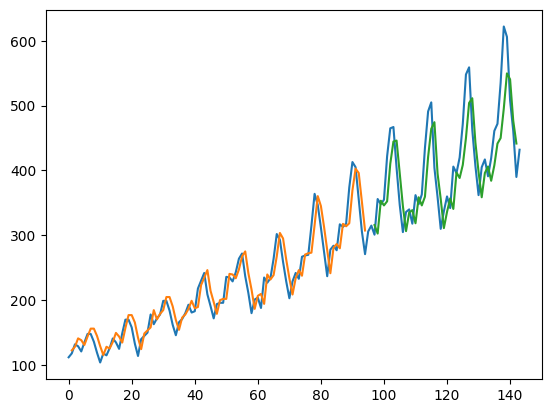

In [18]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Epoch 1/100
94/94 - 2s - loss: 0.0540 - 2s/epoch - 17ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0274 - 140ms/epoch - 1ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0200 - 139ms/epoch - 1ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0178 - 143ms/epoch - 2ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0166 - 112ms/epoch - 1ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0156 - 136ms/epoch - 1ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0145 - 140ms/epoch - 1ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0136 - 149ms/epoch - 2ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0124 - 127ms/epoch - 1ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0113 - 106ms/epoch - 1ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0102 - 151ms/epoch - 2ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0093 - 189ms/epoch - 2ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0082 - 206ms/epoch - 2ms/step
Epoch 14/100
94/94 - 0s - loss: 0.0072 - 202ms/epoch - 2ms/step
Epoch 15/100
94/94 - 0s - loss: 0.0064 - 197ms/epoch - 2ms/step
Epoch 16/100
94/94 - 0s - loss: 0.0054 - 219ms/epoc

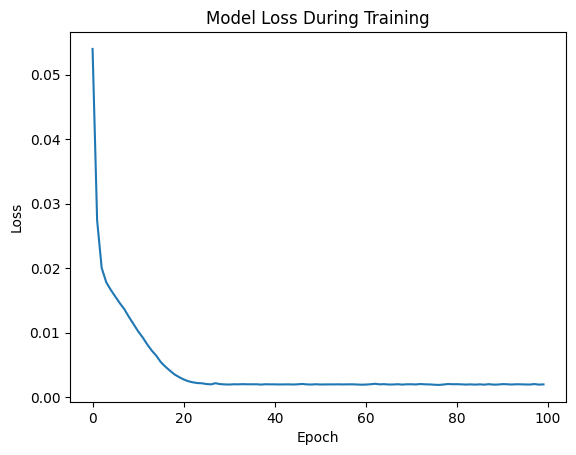

In [20]:
import numpy
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Define your create_dataset function
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# Load your data (assuming it's already loaded as 'dataset' and scaled)

# Set the look_back parameter
look_back = 1

# Create the train and test datasets
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model and store the training history
history = model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# Plot the loss over epochs
plt.plot(history.history['loss'])
plt.title('Model Loss During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()
